Проект __Маркетинговых исследований крупного Интернет-магазина__  

В рамках маркетинговых исследований крупного Интернет-магазина анализируются и проверяются ряд гипотез, направленных на привлечение новых пользователей и увеличения прибыли.
Работа включает в себя выбор приоритетных гипотез и проведения A/B-тестирования этих гипотез.


Представлены данные с характеристиками гипотез (hypothesis.csv) и данные о пользователях (visitors.csv) и их покупках (orders.csv).

__Описание данных__  


Файл /datasets/hypothesis.csv.

    •	Hypothesis — краткое описание гипотезы;
    •	Reach — охват пользователей по 10-балльной шкале;
    •	Impact — влияние на пользователей по 10-балльной шкале;
    •	Confidence — уверенность в гипотезе по 10-балльной шкале;
    •	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv. 

    •	transactionId — идентификатор заказа;
    •	visitorId — идентификатор пользователя, совершившего заказ;
    •	date — дата, когда был совершён заказ;
    •	revenue — выручка заказа;
    •	group — группа A/B-теста, в которую попал заказ.
    
Файл /datasets/visitors.csv. 

    •	date — дата;
    •	group — группа A/B-теста;
    •	visitors — количество пользователей в указанную дату в указанной группе A/B-теста


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth
import scipy.stats as stats
import seaborn as sns

In [2]:
pd.options.display.max_colwidth = 400

In [3]:
try: hypothesis = pd.read_csv(r'/datasets/hypothesis.csv')
except: hypothesis = pd.read_csv(r'hypothesis.csv')

In [4]:
# обработка наименований колонок
def makeNames(df, column_dates=[], column_categories=[], column_dat=[], rename_col = True):
    
    #переименование колонок
    if rename_col:
        df.columns = df.columns.str.lower().str.replace(' ', '_')
    
    # # преобразование колонок с датами
    # for column_date in column_dates:# преобразование колонок с датами
    #     df[column_date] = pd.to_datetime(df[column_date])
   
    # преобразование колонок к дню
    for column_date in column_dat:# преобразование колонок с датами
        df[column_date] = pd.to_datetime(df[column_date]).dt.date
    
    
    print('Общая информация')
    df.info()
    print('*'*50)
    display(df.sample(5, random_state=123).T)
    
    # пропуски
    # print('*'*50)
    # print(f'Пропуски: {df.isna().sum()}')
    
    # проверка явных дублей
    print('*'*50)
    print(f'Явные дубли: {df.duplicated().sum()}')
    
    # проверка не явных дублей
    print('*'*50)
    print(f'Не явные дубли')
    for column_categorie in column_categories:
        print()
        print(f'Колонка: {column_categorie}')
        # print(df[column_categorie].unique())
        print(df[column_categorie].value_counts())
    return df

In [5]:
column_categories = ['hypothesis']
hypothesis = makeNames(hypothesis, [], column_categories)

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
**************************************************


,7,0,5,6,3
hypothesis,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок","Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей","Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов","Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию","Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
reach,10,3,3,5,8
impact,7,10,2,3,3
confidence,8,8,2,8,3
efforts,5,6,3,3,8


**************************************************
Явные дубли: 0
**************************************************
Не явные дубли

Колонка: hypothesis
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Добавить форму подписки на все основные страницы,

## Часть 1 Приоритизация гипотез

Для приоритизации гипотез используются параметры ICE и RICE

__ICE__ (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)

$$
ICE = \frac{влияние * уверенность * простота}{усилия}
$$

 RICE (R от англ. reach, «охват»):
        
Фреймворк RICE состоит из четырёх компонент:  
    
    Reach — скольких пользователей затронет изменение, которое вы хотите внести;
    Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
    Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
    Efforts — сколько стоит протестировать эту гипотезу. 
    

$$
RICE = \frac{охват * влияние * уверенность * простота}{усилия}
$$

Параметры фреймворков ICE и RICE оценивают в удобных шкалах: например, от 0 до 10 или в числах ряда Фибоначчи.

In [9]:
hypothesis['ice'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'])
hypothesis['rice'] = round(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'])

In [10]:
def make_pretty(styler):
    styler.set_caption("Weather Conditions")
    styler.background_gradient(axis=None, vmin=1, vmax=50, cmap="YlGnBu")
    return styler

hypothesis[['hypothesis', 'ICE', 'RICE']].style.pipe(make_pretty)

,hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.000000,40.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.000000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.000000,4.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.000000,112.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.000000,16.000000


Наиболее приоритетной гипотезой согласно модели ICE является __«Запустить акцию, дающую скидку на товар в день рождения»__ с 16 баллами.  

Если в расчет добавим охват, то получим модель RICE, согласно которой более перспективной будет гипотеза __«Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок»__.

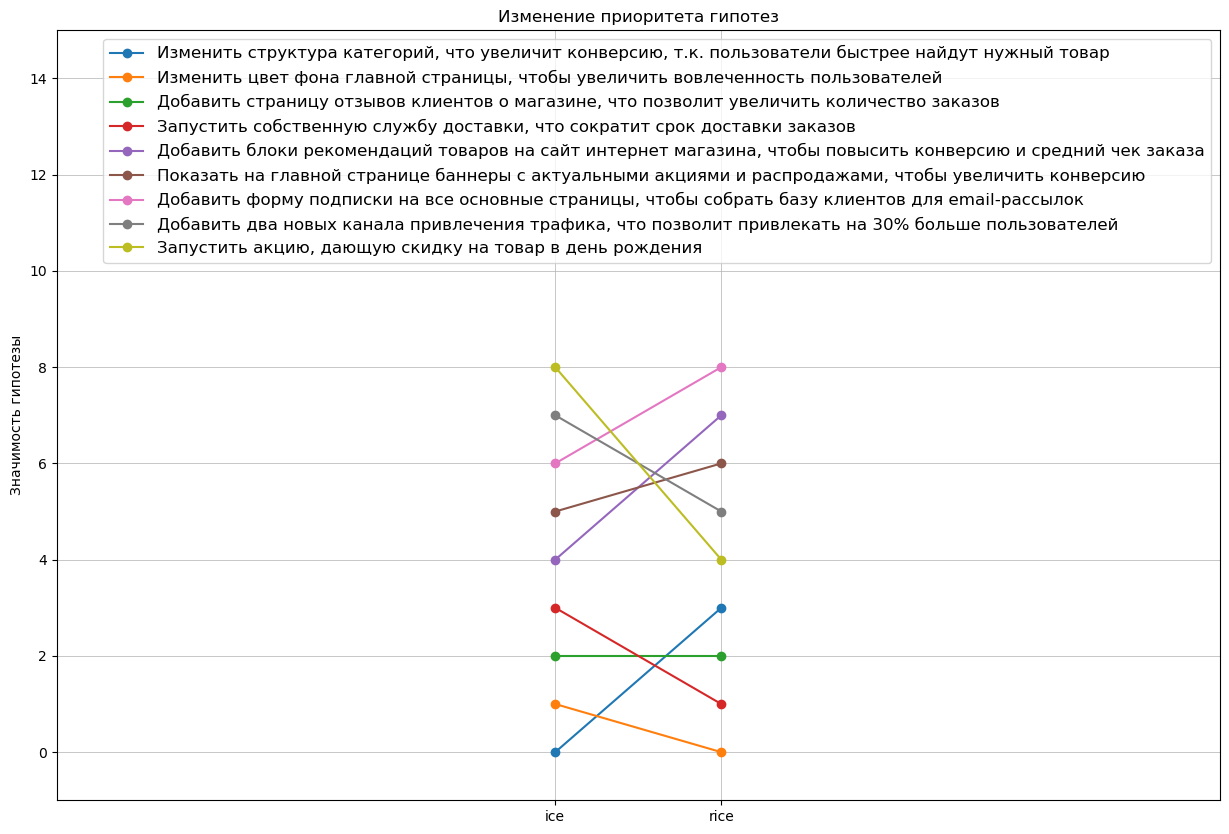

In [12]:
# Сначала проранжировать гипотезы, 
ice = hypothesis[['hypothesis', 'ice']].sort_values(by='ice').reset_index(drop=True).reset_index().drop('ice', axis=1)
rice = hypothesis[['hypothesis', 'rice']].sort_values(by='rice').reset_index(drop=True).reset_index().drop('rice', axis=1)

combo = ice.merge(rice, on='hypothesis')
combo = combo.set_axis(['ice', 'hypothesis', 'rice'], axis=1)

# И построить график
fig, ax = plt.subplots(figsize=(15, 10))

for i in hypothesis.index:
    ax.plot(combo.iloc[i, [0, 2]], marker ='o', label=f'{combo.iloc[i, 1]}')
plt.ylabel('Значимость гипотезы')
plt.ylim(-1, 15)
plt.xlim(-3, 4)
plt.grid(linestyle='-', linewidth=0.5)
plt.legend(loc='upper right', fontsize='large')
plt.title('Изменение приоритета гипотез')
plt.show()

## Часть 2. Анализ A/B-теста

In [8]:
try: orders = pd.read_csv(r'/datasets/orders.csv', parse_dates=['date'], dayfirst=True)
except: orders = pd.read_csv(r'orders.csv', parse_dates=['date'], dayfirst=True)

try: visitors = pd.read_csv(r'/datasets/visitors.csv', parse_dates=['date'], dayfirst=True)
except: visitors = pd.read_csv(r'visitors.csv', parse_dates=['date'], dayfirst=True)

In [9]:
orders = makeNames(orders, [], ['group'], rename_col = False)

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
**************************************************


,156,529,856,895,35
transactionId,2531740433,90109939,2318242783,1646874005,2258664213
visitorId,3131127734,2075769885,1634934899,2306096143,258610743
date,2019-08-22 00:00:00,2019-08-19 00:00:00,2019-08-27 00:00:00,2019-08-21 00:00:00,2019-08-15 00:00:00
revenue,8090,3525,770,13354,2355
group,B,B,B,A,B


**************************************************
Явные дубли: 0
**************************************************
Не явные дубли

Колонка: group
B    640
A    557
Name: group, dtype: int64


In [10]:
visitors = makeNames(visitors, [], ['group'], rename_col = False)

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
**************************************************


,24,39,15,31,43
date,2019-08-25 00:00:00,2019-08-09 00:00:00,2019-08-16 00:00:00,2019-08-01 00:00:00,2019-08-13 00:00:00
group,A,B,A,B,B
visitors,621,610,361,713,769


**************************************************
Явные дубли: 0
**************************************************
Не явные дубли

Колонка: group
A    31
B    31
Name: group, dtype: int64


In [11]:
# пользователи, встречающиеся как в группе А так и в группе B
visitorId_A = orders[orders['group'] == 'A']['visitorId'].unique()
orders_A_B = orders[orders['group'] == 'B'].query('visitorId in @visitorId_A')['visitorId'].unique()

In [12]:
# много ли таких записей в группе В
orders[np.logical_and(orders['group'] == 'A', orders['visitorId'].isin(orders_A_B))].nunique()

transactionId    89
visitorId        58
date             27
revenue          82
group             1
dtype: int64

In [13]:
round(len(orders[orders['visitorId'].isin(orders_A_B)])/len(orders)*100)

15

In [14]:
orders = orders.query('visitorId not in @orders_A_B')
len(orders)

1016

In [15]:
# подготовка данных
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [16]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5).T 

,0,1,2,3,4
date,2019-08-01 00:00:00,2019-08-02 00:00:00,2019-08-03 00:00:00,2019-08-04 00:00:00,2019-08-05 00:00:00
ordersPerDateA,23,19,24,11,22
revenuePerDateA,142779,91602,112473,41176,86383
ordersPerDateB,17,23,14,14,21
revenuePerDateB,59758,162043,67049,96890,89908
ordersCummulativeA,23,42,66,77,99
revenueCummulativeA,142779,234381,346854,388030,474413
ordersCummulativeB,17,40,54,68,89
revenueCummulativeB,59758,221801,288850,385740,475648
visitorsPerDateA,719,619,507,717,756


Напомним названия столбцов данных:  

    date — дата;
    ordersPerDateA — количество заказов в выбранную дату в группе A;
    revenuePerDateA — суммарная выручка в выбранную дату в группе A;
    ordersPerDateB — количество заказов в выбранную дату в группе B;
    revenuePerDateB — суммарная выручка в выбранную дату в группе B;
    ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
    revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
    ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
    revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
    visitorsPerDateA — количество пользователей в выбранную дату в группе A;
    visitorsPerDateB — количество пользователей в выбранную дату в группе B;
    visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
    visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [17]:
#данные даны за один месяц, для удобства отображения на графики представим дату как день месяца  
print(data['date'].min(), data['date'].max())
data['day'] = pd.DatetimeIndex(data['date']).day

2019-08-01 00:00:00 2019-08-31 00:00:00


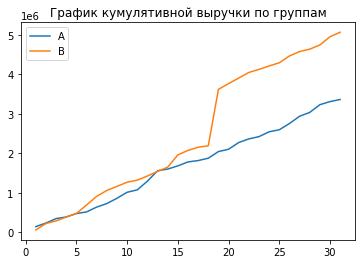

In [18]:
# Строим график выручки группы А
plt.plot(data['day'], data['revenueCummulativeA'], label='A')
# Строим график выручки группы B
plt.plot(data['day'], data['revenueCummulativeB'], label='B')
plt.legend() 
plt.title('График кумулятивной выручки по группам')
plt.show()

Кумулятивная выручка в середине месяца в группе 'B' начинает расти быстрее чем в группе 'A'.

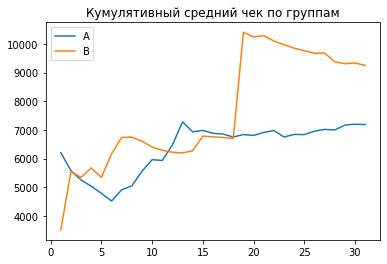

In [19]:
# графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot( data['day'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot( data['day'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')
plt.legend() 
plt.title('Кумулятивный средний чек по группам')
plt.show()

На двадцатый день тестирования резко увеличился средний чек группы 'B', и дальнейшее его снижение было не существенным.

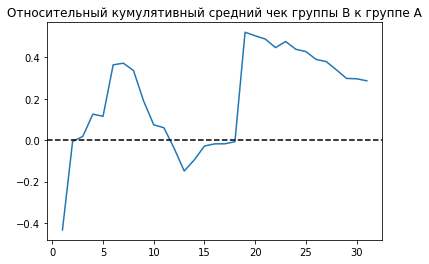

In [20]:
# Построим график относительного различия для среднего чека. 
# Добавим горизонтальную ось методом axhline() (от англ. horizontal line across the axis*, «горизонтальная линия поперек оси»)

# cтроим отношение средних чеков
plt.plot(data['day'], (data['revenueCummulativeB']/data['ordersCummulativeB'])\
                         /(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительный кумулятивный средний чек группы В к группе А')
plt.show()

Подтверждает предыдущие график. Если в начале недели наблюдались колебания вокруг нулевой оси, то в конце показатели группы 'B' относительно группы 'A' были стабильно выше. 

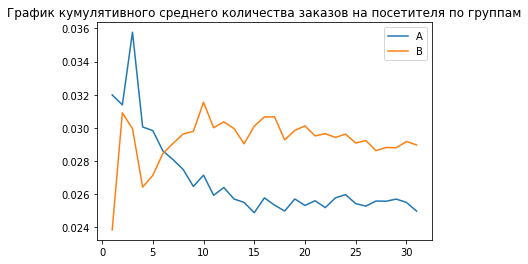

In [21]:
# Аналогично проанализируем график кумулятивного среднего количества заказов на посетителя по группам. 

# считаем среднее количество заказов на посетителя с накоплением 
data['conversionA'] = data['ordersCummulativeA']/data['visitorsCummulativeA']
data['conversionB'] = data['ordersCummulativeB']/data['visitorsCummulativeB']

# строим графики
plt.plot(data['day'], data['conversionA'], label='A')
plt.plot(data['day'], data['conversionB'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.show()

Среднее кумулятивное количество заказов на пользователя после колебаний в первые дни после 5 дня у группы 'B' в оставшийся период был высоким, а у группы 'A' низким. 

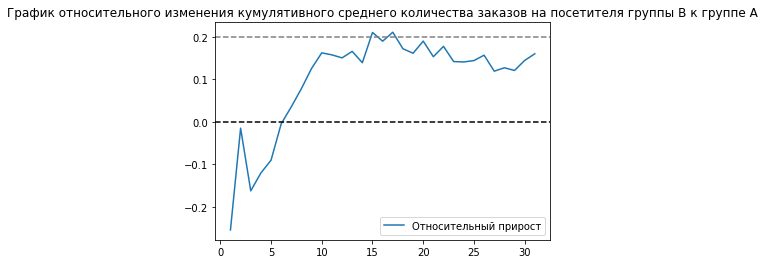

In [22]:
# Построим график изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

plt.plot(data['day'], data['conversionB']/data['conversionA']-1, label="Относительный прирост")
plt.legend()#'Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.show()

На этом графике хорошо видно превосходство кумулятивного среднего количества заказов группы 'B' по отношению к группе 'A'. 

In [23]:
# сгруппируем общее количество заказов по пользователям
transactionid_count = orders.groupby(
                'visitorId', 
                as_index=False
                )\
            .agg(  
                visitorid_count = ('transactionId', 'count')
                )
    

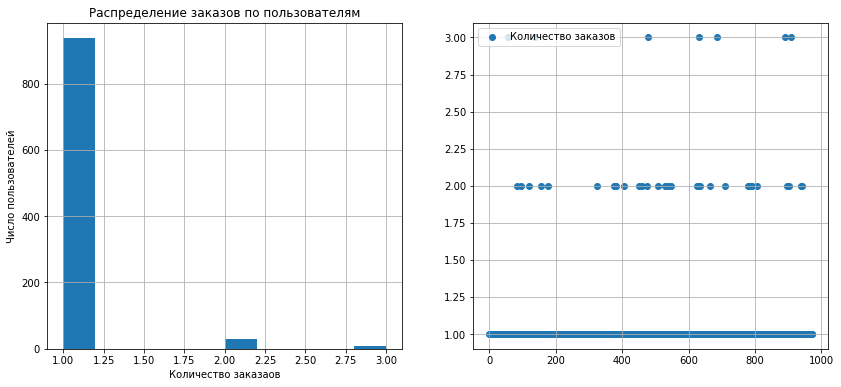

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(transactionid_count['visitorid_count'])
ax1.grid(True)
ax1.set_title('Распределение заказов по пользователям')
ax1.set_xlabel('Количество заказаов')
ax1.set_ylabel('Число пользователей')

x_values = pd.Series(range(0,len(transactionid_count)))
ax2.scatter(transactionid_count.index, transactionid_count['visitorid_count'], label='Количество заказов')
ax2.grid(True)
ax2.legend()
plt.show()

Большинство пользователей делают один заказ, существенно ниже два и более. Но есть пользователи с 8 и 10 заказами. 

In [25]:
# пункт 7 95-й и 99-й перцентили количества заказов на пользователя
np.percentile(transactionid_count['visitorid_count'], [95, 99])

array([1., 2.])

95% пользователей делают не более двух заказоа, 99% не более 4. Пользователей с заказами более 2 штук можно исключить из рассмотрения.  

In [26]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(transactionid_count['visitorid_count'])
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


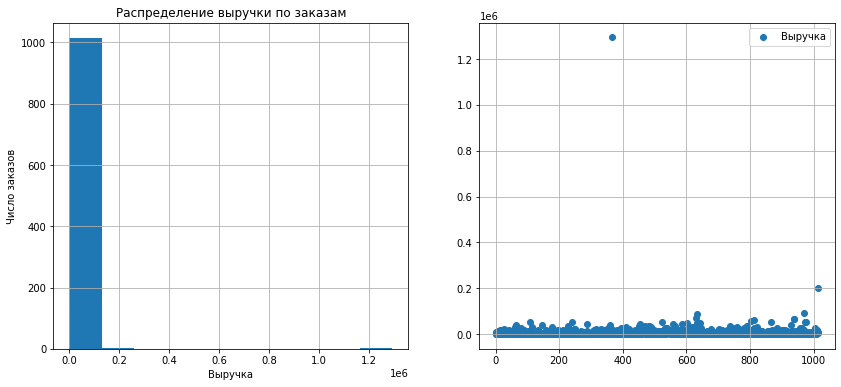

In [27]:
# Точечный график стоимостей заказов.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(orders['revenue'])
ax1.grid(True)
ax1.set_title('Распределение выручки по заказам')
ax1.set_xlabel('Выручка')
ax1.set_ylabel('Число заказов')

x_values = pd.Series(range(0,len(orders)))
ax2.scatter(x_values, orders['revenue'], label='Выручка')
ax2.grid(True)
ax2.legend()
plt.show()

Стоимость большинство заказов не превышают 20 тысяч, но есть один очень большой заказ.  

In [28]:
# Посчитать 95-й и 99-й перцентили стоимости заказов.
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

95 процентов заказов не превышают сумму в 28 тысяч, 99 не более 58 тысяч. Заказы более 28 тысяч можно исключить. 

In [29]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(orders['revenue'])
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами  с помощью  критерия __Манна-Уитни__, потому что есть выбросы и распределения не являются нормальными.

In [30]:
# расчет статистической значимости различий в среднем количестве заказов на посетителя между группами
def calculation_p_value_orders(data_, ordersByUsersA_, ordersByUsersB_, abnormalUsers_=[]):
     
    sampleA = pd.concat(
        [
            ordersByUsersA_[
                            np.logical_not(ordersByUsersA_['userId'].isin(abnormalUsers_))
                          ]
            ['orders'],
            pd.Series(
                0,
                index=np.arange(
                    data_['visitorsPerDateA'].sum() - len(ordersByUsersA_['orders'])
                ),
                name='orders',
            ),
        ],
        axis=0,
    )

    sampleB = pd.concat(
        [
            ordersByUsersB_[
                            np.logical_not(ordersByUsersB_['userId'].isin(abnormalUsers_))
                          ]
            ['orders'],
            pd.Series(
                0,
                index=np.arange(
                    data_['visitorsPerDateB'].sum() - len(ordersByUsersB_['orders'])
                ),
                name='orders',
            ),
        ],
        axis=0,
    )
    
    alpha = 0.05  # критический уровень статистической значимости
    
    results = stats.mannwhitneyu(sampleA, sampleB)
    print("p-значение: {0:.3f}".format(results[1]))

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
    print("Относительное различие групп 'B' к 'A' {0:.0%}".format(sampleB.mean() / sampleA.mean() - 1))

In [31]:
# расчет статистической значимости различий в среднем чеке заказа между группами
def calculation_p_value_revenue(orders_, abnormalUsers_=[]):
    
    sampleA = orders_[
                np.logical_and(
                    orders_['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers_)),
                )
            ]['revenue']
    

    sampleB = orders_[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders_['visitorId'].isin(abnormalUsers_)),
                )
            ]['revenue']
    
     
    alpha = 0.05  # критический уровень статистической значимости
    
    results = stats.mannwhitneyu(sampleA, sampleB)
    print("p-значение: {0:.3f}".format(results[1]))

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
    print("Относительное различие групп 'B' к 'A' {0:.0%}".format(sampleB.mean() / sampleA.mean() - 1))

In [32]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [33]:
calculation_p_value_orders(data, ordersByUsersA, ordersByUsersB)

p-значение: 0.011
Отвергаем нулевую гипотезу: разница статистически значима
Относительное различие групп 'B' к 'A' 16%


P-value меньше 0.05, нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительное различие среднего группы "B" к группы "A" равен 14%. 

In [34]:
calculation_p_value_revenue(orders)

p-значение: 0.829
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительное различие групп 'B' к 'A' 29%


P-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
Однако, средний чек группы B выше среднего чека группы A на 26%.

Ранее было установлено, что 95% пользователей делают не более 2 заказов и 95% заказов не превышают сумму 28 000. Введем эти ограничения.

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsersA['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsersB['orders'], 95)]['userId'],
    ],
    axis=0,
)

revenue_lim = np.percentile(orders['revenue'], 95)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
# print(abnormalUsers.head(5))
print('Количество аномальных пользователей', abnormalUsers.shape[0]) 

Количество аномальных пользователей 86


In [36]:
calculation_p_value_orders(data, ordersByUsersA, ordersByUsersB, abnormalUsers)

p-значение: 0.016
Отвергаем нулевую гипотезу: разница статистически значима
Относительное различие групп 'B' к 'A' 17%


Результаты по среднему количеству заказов на пользователя изменились не сильно. Как и в случае с сырыми данными, статистическая значимость достигнута, p-значение сократилось еще больше.  Относительный прирост среднего группы "B" к группы "A" увеличился до 14%.  
Группа B лучше группы A.

In [37]:
calculation_p_value_revenue(orders, abnormalUsers)

p-значение: 0.727
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительное различие групп 'B' к 'A' -3%


P-value по-прежнему больше 0.05. Нулевую гипотезу не отвергаем и по прежнему считаем, что в среднем чеке различий нет. 
При этом относительная разница среднего чека группы B к группе A стал отрицательным.

### __Выводы__  

Кумулятивные метрики выручки, среднего чека и отношение среднего чека группы B к группе A после волатильности в начале месяца к концу месяца стабилизировались и показали преимущество группы В.    
Те же показатели количества заказов на одного пользователя так же после колебаний в начале, к концу стабилизировались, и так же показали преимущество группы В.  
Временной период, за который были взяты данные достаточен для проведения А/В тестирования.  
Анализ аномальных показателей показал наличие выбросов как по количеству заказов, так и по их стоимости.   

А/В тестирование на неочищенных данных:  

	- различие в количестве заказов на одного пользователя по группам статистически значимо, относительное различие – 14%;
	- различие в среднем чеке оказалось не существенным, при этом относительная разница среднего показала превышение группы В на 25%, что странно.
    
А/В тестирование на очищенных данных:  

    - подтвердили выводы тестирования на неочищенных данных;
	- как и на неочищенных данных различие в среднем чеке оказалось не существенным и на очищенных данных, при этом относительная разница среднего группы В стала отрицательной, что сходится с результатами проверки гипотезы.  
    
Тестироваине можно остановить и зафиксировать победу группы В в части роста заказов на одного пользователя. 

А/В тестирование показало увеличения количества заказов у пользователей из группы В. При этом разница среднего чека в двух группах не обнаружена. Рост выручки группы В в середине месяца обусловлен случайным очень большим заказом, не характеризующим всю группу. Повторное исследование куммулятивных метрик ниже это подтвердили. 


## Пересчет кумулятивных метрик по очищенным данным.

In [38]:
orders.sort_values(by = 'revenue', ascending=False).head(5)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A


Выброс по стоимости заказа как раз приходится на 19 число и относится к группе В, что и обуславливало рост кумулятивных метрик группы В  в середине месяца. 

In [39]:
ordersADaily = (
                orders[
                        np.logical_and(
                                        orders['group'] == 'A',
                                        np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                                        )
    ][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[
            np.logical_and(
                                        orders['group'] == 'B',
                                        np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                                        )][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5).T 

,0,1,2,3,4
date,2019-08-01 00:00:00,2019-08-02 00:00:00,2019-08-03 00:00:00,2019-08-04 00:00:00,2019-08-05 00:00:00
ordersPerDateA,13,15,24,10,20
revenuePerDateA,31869,46483,112473,41066,79593
ordersPerDateB,17,18,14,11,20
revenuePerDateB,59758,84864,67049,52690,61558
ordersCummulativeA,13,28,52,62,82
revenueCummulativeA,31869,78352,190825,231891,311484
ordersCummulativeB,17,35,49,60,80
revenueCummulativeB,59758,144622,211671,264361,325919
visitorsPerDateA,719,619,507,717,756


In [40]:
#данные даны за один месяц, для удобства отображения на графики представим дату как день месяца  
print(data['date'].min(), data['date'].max())
data['day'] = pd.DatetimeIndex(data['date']).day

2019-08-01 00:00:00 2019-08-31 00:00:00


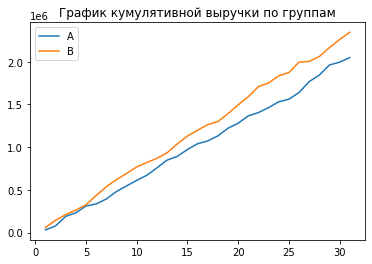

In [41]:
# Строим график выручки группы А
plt.plot(data['day'], data['revenueCummulativeA'], label='A')
# Строим график выручки группы B
plt.plot(data['day'], data['revenueCummulativeB'], label='B')
plt.legend() 
plt.title('График кумулятивной выручки по группам')
plt.show()

Кумулятивная выручка в очищенных данных по группе 'B' немного превышает по группе 'A'.

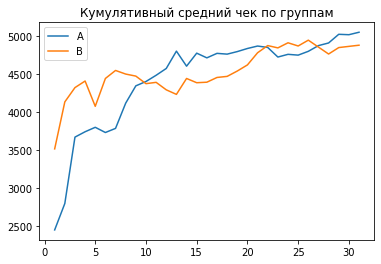

In [42]:
# графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot( data['day'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot( data['day'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')
plt.legend() 
plt.title('Кумулятивный средний чек по группам')
plt.show()

На очищенныъ данных средний чек группы 'B' и группы 'B' близки.

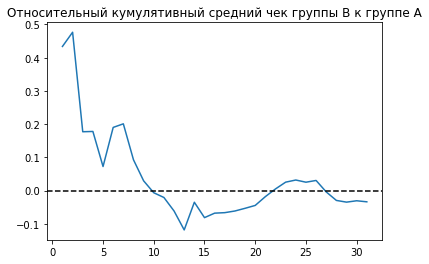

In [43]:
# Построим график относительного различия для среднего чека. 
# Добавим горизонтальную ось методом axhline() (от англ. horizontal line across the axis*, «горизонтальная линия поперек оси»)

# cтроим отношение средних чеков
plt.plot(data['day'], (data['revenueCummulativeB']/data['ordersCummulativeB'])\
                         /(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительный кумулятивный средний чек группы В к группе А')
plt.show()

Относительное различие к концу месяца маленькое.

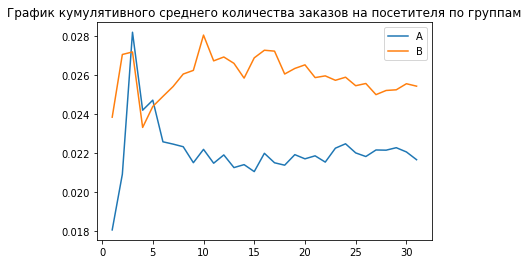

In [44]:
# Аналогично проанализируем график кумулятивного среднего количества заказов на посетителя по группам. 

# считаем среднее количество заказов на посетителя с накоплением 
data['conversionA'] = data['ordersCummulativeA']/data['visitorsCummulativeA']
data['conversionB'] = data['ordersCummulativeB']/data['visitorsCummulativeB']

# строим графики
plt.plot(data['day'], data['conversionA'], label='A')
plt.plot(data['day'], data['conversionB'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.show()

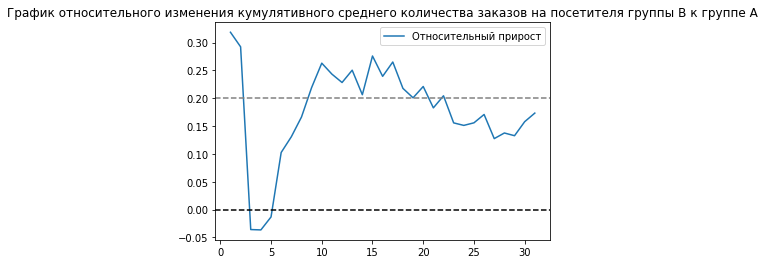

In [45]:
# Построим график изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

plt.plot(data['day'], data['conversionB']/data['conversionA']-1, label="Относительный прирост")
plt.legend()#'Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.show()

Данные по среднему количеству заказов на пользователя не изменились.